CSV file created successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sender     3 non-null      object
 1   receiver   3 non-null      object
 2   subject    3 non-null      object
 3   timestamp  3 non-null      object
 4   content    3 non-null      object
dtypes: object(5)
memory usage: 252.0+ bytes
None


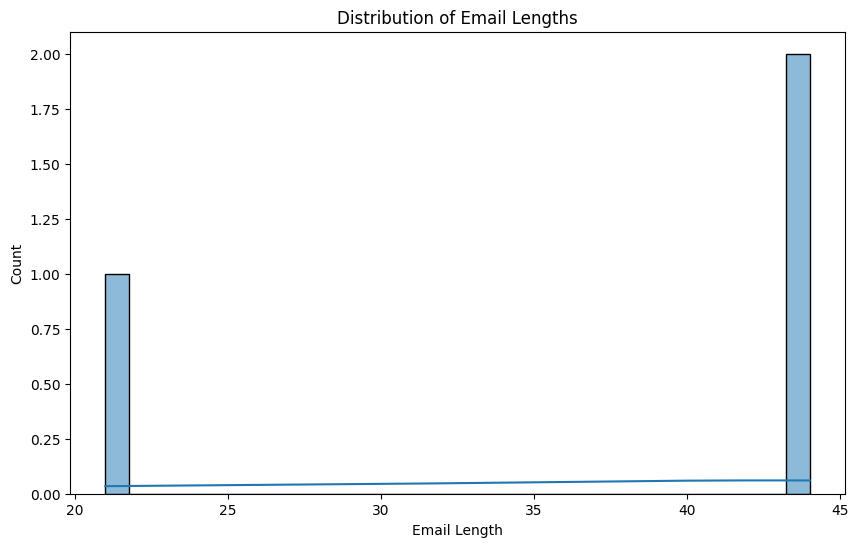

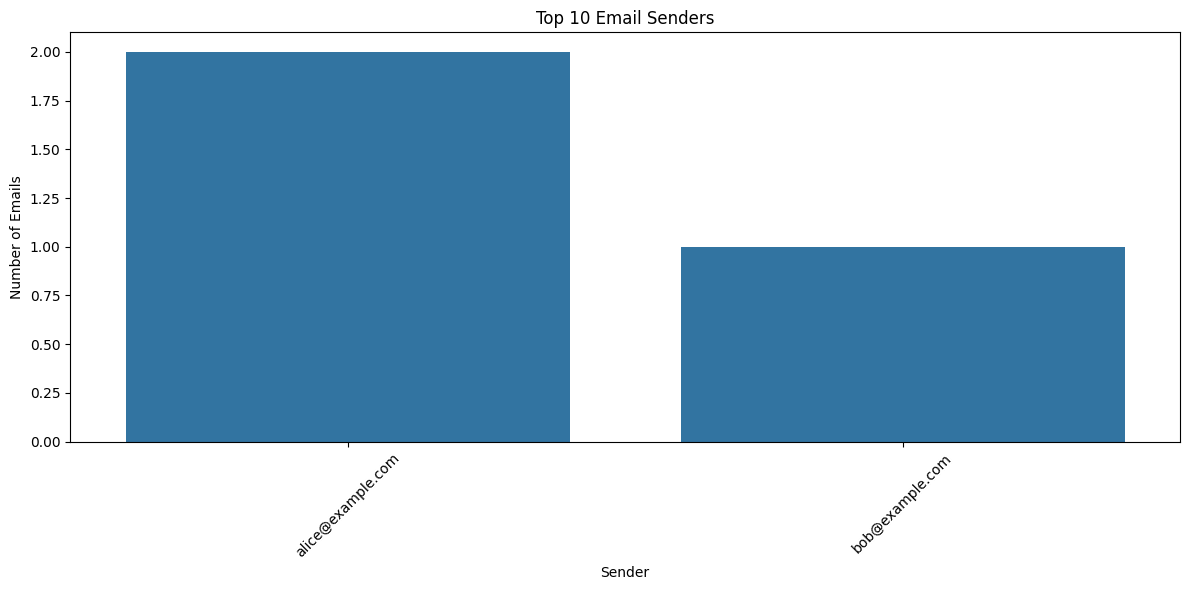

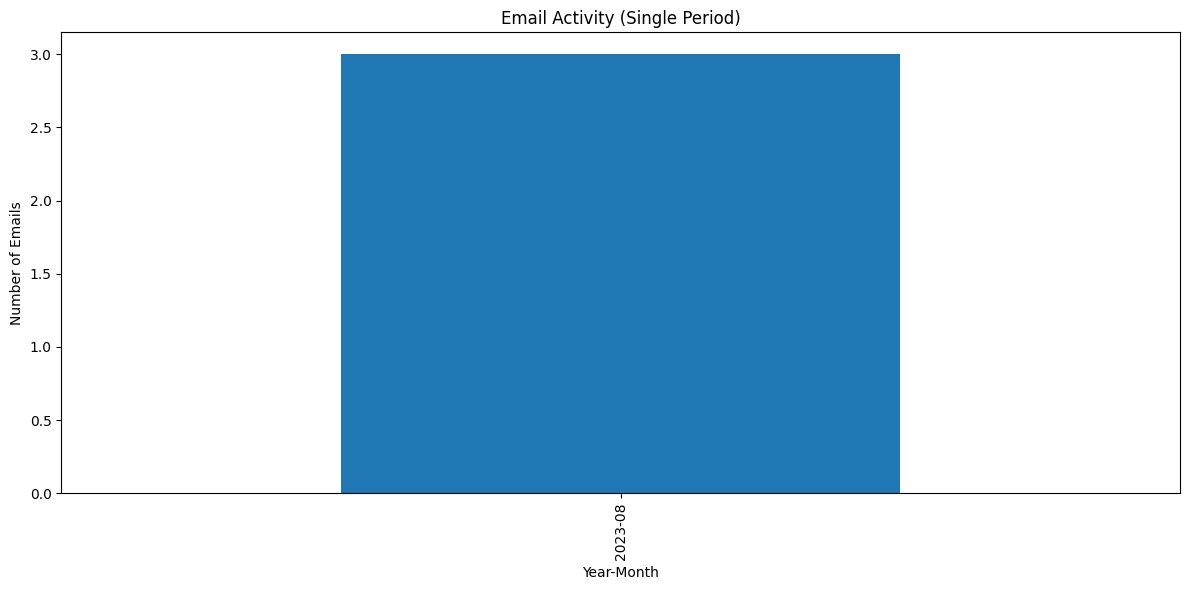

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Create the DataFrame
data = { 
    'sender': ['alice@example.com', 'bob@example.com', 'alice@example.com'], 
    'receiver': ['bob@example.com', 'alice@example.com', 'carol@example.com'], 
    'subject': ['Hello', 'Meeting Reminder', 'Project Update'], 
    'timestamp': ['2023-08-01 10:00:00', '2023-08-02 14:30:00', '2023-08-03 09:15:00'], 
    'content': ['Hi Bob,\n\nHow are you?', 
                'Hi Alice,\n\nDon\'t forget the meeting at 3 PM.', 
                'Hi Carol,\n\nHere\'s the latest project update.'] 
} 

# Save to CSV
df = pd.DataFrame(data) 
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df.to_csv('emails.csv', index=False) 
print("CSV file created successfully.")

# Read and process CSV
df = pd.read_csv("emails.csv") 
print(df.info()) 
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df.dropna(inplace=True) 

# Add email length
df['email_length'] = df['content'].apply(len) 

# Plot distribution of email lengths
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df, x='email_length', bins=30, kde=True) 
plt.xlabel('Email Length') 
plt.ylabel('Count') 
plt.title('Distribution of Email Lengths') 
plt.show() 

# Top senders
top_senders = df['sender'].value_counts()[:10] 
plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_senders.index, y=top_senders.values) 
plt.xticks(rotation=45) 
plt.xlabel('Sender') 
plt.ylabel('Number of Emails') 
plt.title('Top 10 Email Senders') 
plt.tight_layout() 
plt.show() 

# Email activity over time
df['year_month'] = df['timestamp'].dt.to_period('M')
email_activity = df.groupby('year_month').size()

plt.figure(figsize=(12, 6)) 
if len(email_activity) > 1:
    email_activity.plot(kind='line')
    plt.xlabel('Year-Month') 
    plt.ylabel('Number of Emails') 
    plt.title('Email Activity Over Time')
    plt.xticks(rotation=45) 
else:
    # Fallback to bar plot if only one time period
    email_activity.plot(kind='bar')
    plt.xlabel('Year-Month') 
    plt.ylabel('Number of Emails') 
    plt.title('Email Activity (Single Period)')
plt.tight_layout() 
plt.show()
